In [1]:
from tools import SourceFunctions
from interface import CalcFlux
import numpy as np
import matplotlib.pyplot as plt

### Generate a field defined by user

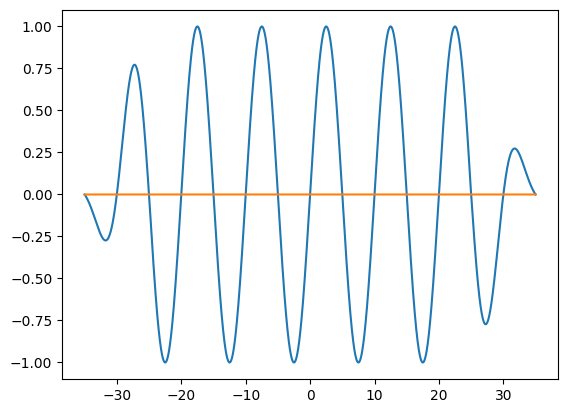

In [2]:
sf = SourceFunctions()
field = sf.create_field_profile(5, 10, 0, 1, 1001)

rz = field[:, 0]
bx = field[:, 1]
by = field[:, 2]

plt.plot(rz, bx)
plt.plot(rz, by)

### Create an object to calc flux

In [3]:
calcflux = CalcFlux()

#  Select source defined by user
calcflux.source_type = calcflux.CalcTypes.user_defined

#  Set generated field as input field
calcflux.field = field